In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\aaron\Downloads\archive'

In [5]:
df = pd.read_csv(os.path.join(path, 'A6_Data.csv'), index_col = False)

In [7]:
df = df.drop(columns = ['Unnamed: 0'])

## Part 3

In [11]:
df.head()

,world_rank,institution,country,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,3.57,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,7.14,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,8.00,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,18.71,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,19.57,85.21,2012


In [13]:
# Making a subset
df_sub = df.loc[df['institution'] == 'University of Washington - Seattle']

In [15]:
df_sub

,world_rank,institution,country,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year
38,39,University of Washington - Seattle,USA,28,101,101,40,5,7,5,101,51.43,52.25,2012
130,31,University of Washington - Seattle,USA,22,101,101,41,7,8,5,51,44.86,55.79,2013
231,32,University of Washington - Seattle,USA,23,89,107,46,9,11,8,54,46.29,60.28,2014
1230,31,University of Washington - Seattle,USA,23,48,103,41,9,10,10,40,37.29,60.61,2015


In [17]:
df_sub = df_sub.drop(columns = ['institution', 'country', 'national_rank', 'rank_for_education', 'rank_for_alumni_employment', 'rank_for_faculty', 'rank_for_publications', 'rank_for_influence', 'rank_for_number_of_students', 'rank_for_patents', 'average_rank', 'score'])

In [19]:
df_sub

,world_rank,year
38,39,2012
130,31,2013
231,32,2014
1230,31,2015


In [25]:
df_sub.dtypes

world_rank    int64
year          int64
dtype: object

In [27]:
df_sub['year'] = df_sub['year'].astype('str')

In [29]:
df_sub.dtypes

world_rank     int64
year          object
dtype: object

In [31]:
from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['year'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['year'], axis=1, inplace=True)

In [33]:
df_sub

,world_rank
datetime,
2012-01-01,39
2013-01-01,31
2014-01-01,32
2015-01-01,31


In [35]:
df_sub.rename(columns = {'world_rank' : 'University of Washington World Rank'}, inplace = True)

In [37]:
df_sub

,University of Washington World Rank
datetime,
2012-01-01,39
2013-01-01,31
2014-01-01,32
2015-01-01,31


Because I could only use one veriable for this time series I decided to look at the University of Washington's world ranks because I wanted a university that had ranks for all 4 years, and I only live an hour drive away from Seattle.

## Part 4

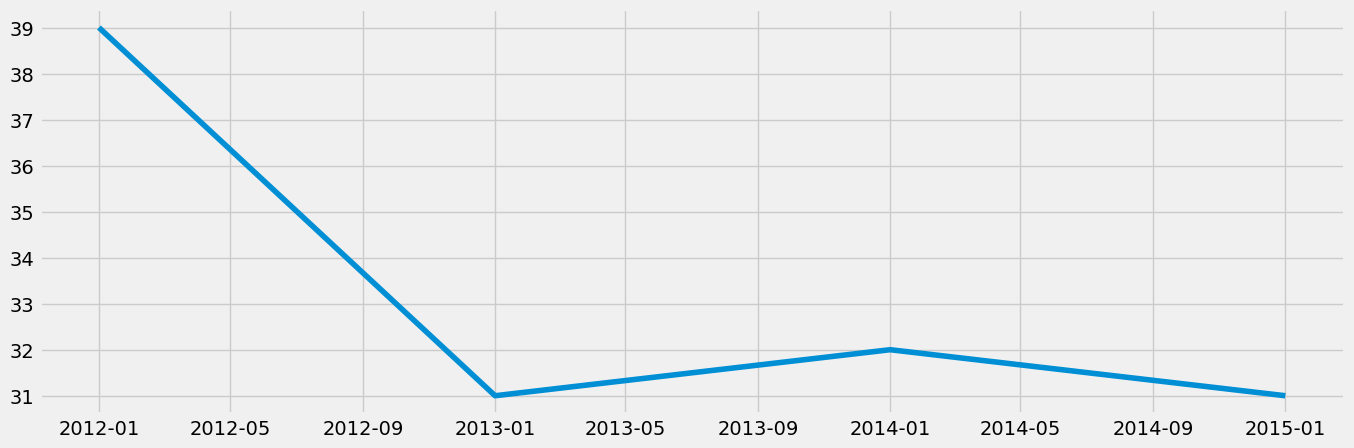

In [42]:
# Ploting the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

## Part 5

In [46]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df_sub, model = 'multiplicative')

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

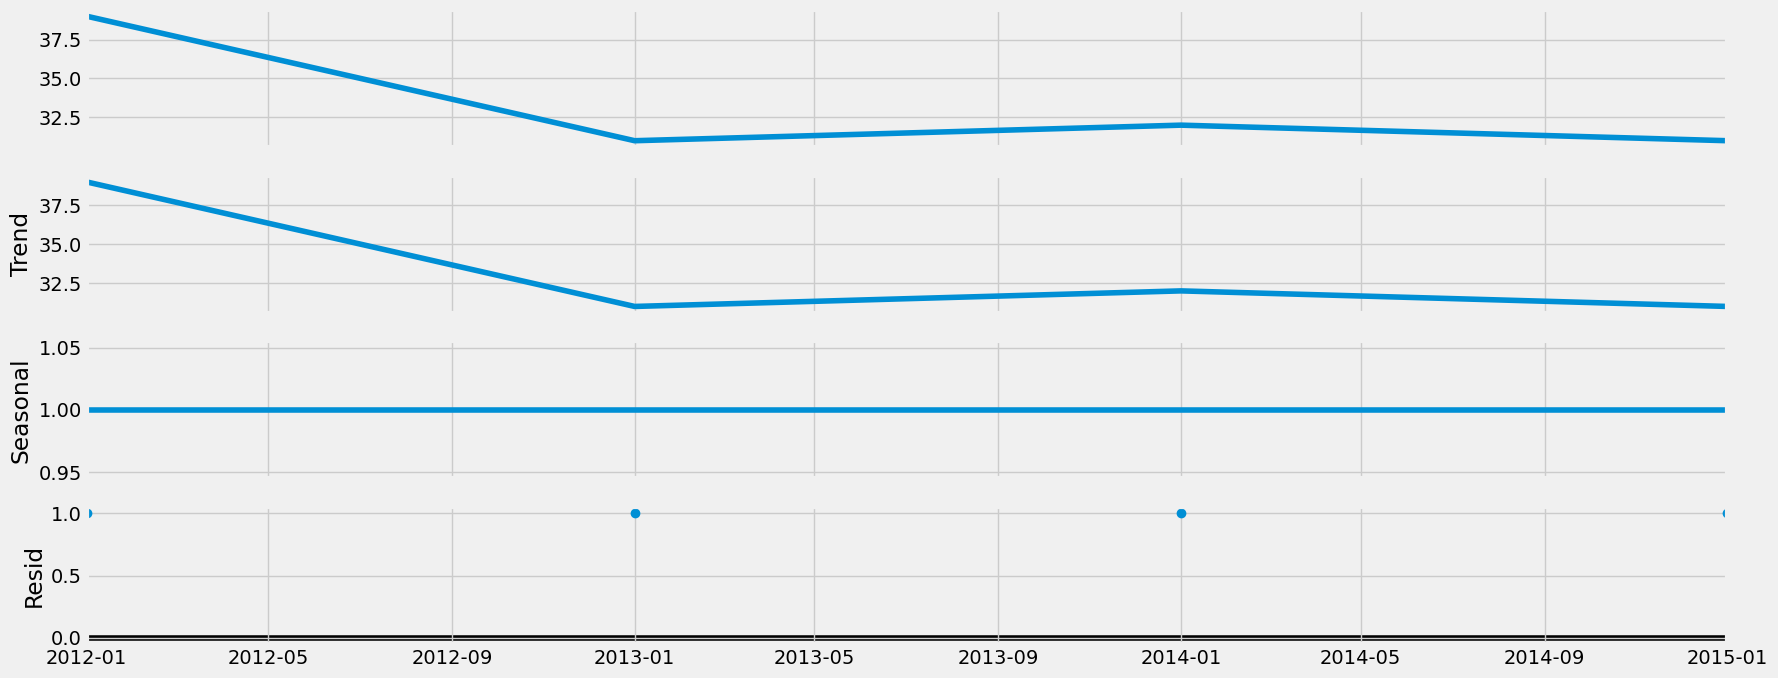

In [50]:
decomposition.plot()
plt.show()

Considering that the data I have only has 4 time based data points, I knew that this time series wasn't going to be that affective. There is no seasonality because the data is collected annually. And you can't analyze anything from the resid graph.

## Part 6

In [57]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub['University of Washington World Rank'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.014487e+01
p-value                        8.236430e-18
Number of Lags Used            0.000000e+00
Number of Observations Used    3.000000e+00
Critical Value (1%)           -1.041719e+01
Critical Value (5%)           -5.778381e+00
Critical Value (10%)          -3.391681e+00
dtype: float64


The test statistic is smaller than the 5% and 10% critical values, and the p-value is less than 0.05.

Even though it doesn't look like it in the line chart, the stationarity tests say that the data is stationary. Probably because of the small amount of time based data points I'm working with.

## Part 9

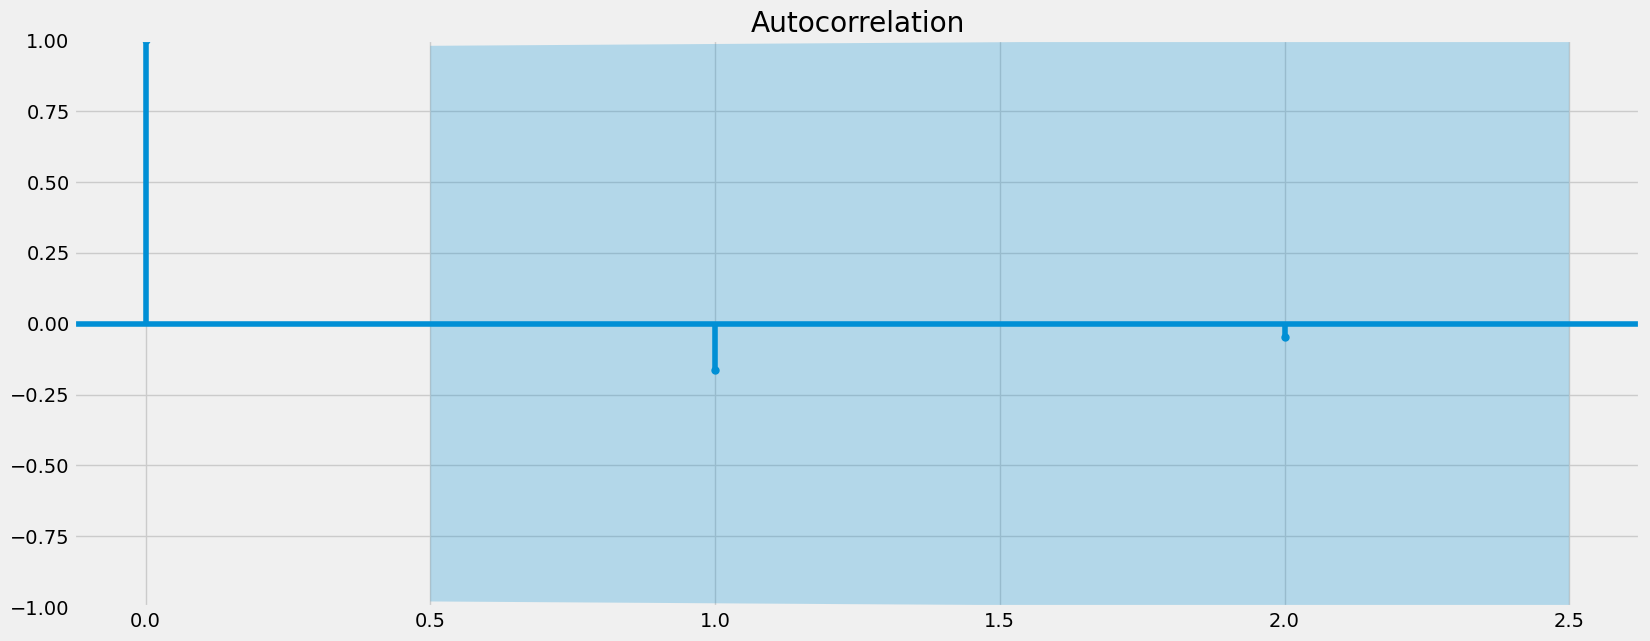

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub)
plt.show()